# Tensorflow: Linear regression- understanding the concept.  

In simple words linear regression is predicting the value of Y(dependent variable) based on some variable X(independednt variable) provided there is a relation between X and Y. 

Linear regression between two varibles can be represented as : 
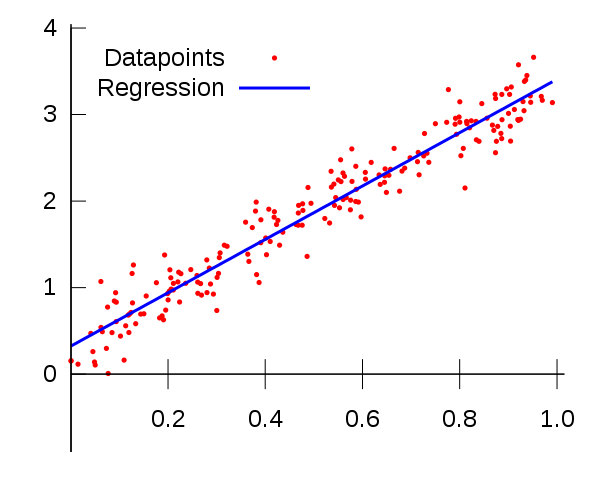

The blue line in above fig is called as regression line. As we can see some points are on regresion line and some are not, this is because our regression line is a probabilistic model and our predictions are approximate.So there will be some error/ deviation from actual value of variable Y(Blue line): 
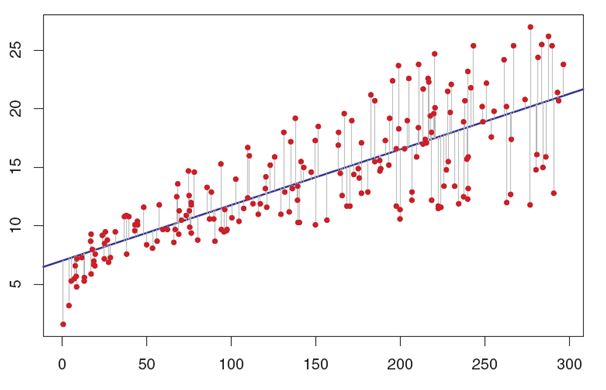

In above fig the distance betweeen data points(red dots) and the regression line(blue line) is the error . If a data point is on the regression line then the error is zero and similary if the distance between data point and regression line is 'd' than error is 'd'. 

Now how we can minimize the error or can how we can find the best fit or best regression line for the given data set?.
For solving this problem we use method of "least square".

Mathematical representation of a regression line: 
Y= b0+b1*X+e

Y-Dependant variable.

X-Independent variable.

b0 –intercept of the regression line.

b1-slope of the regression line.

e- error/deviation from actual/observed value of variable Y.

Suppose we fit n points of the form (x1,y1) ,(x2,y2)…..(xn,yn)to the above regression line then:

                                 ei= Yi-b0-b1* Xi 
Where ei is the difference between ith observed response value and the ith response value that is predicted by our line. 

Our aim here is to minimize this error so that we can get the best possible regression line.

Now this error ei can be positive or negative but we are only interested in the magnitude of the error and not in its sign. Hence we square the errors and minimize the sum of squared errors(SSE).

   SSE= summation(ei^2)
   SSE= summation((Yi-b0-b1* Xi)^2)
   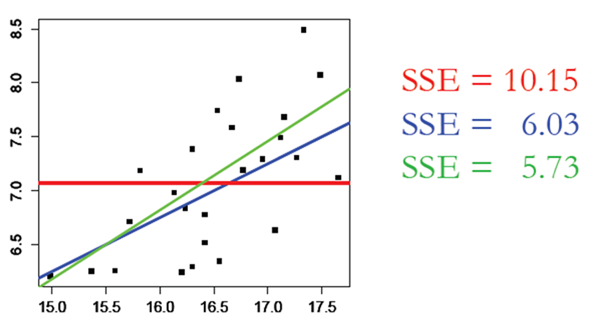
   
   

In above fig the green line is best fir because the green line has least squared error. 

# Now lets understand the code of a simple regression usinf tensorflow.  

Now we are importing the important libraries !

In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
boston = load_boston()  #impoting bostan data base

# Create Features and Labels Dataframes

In [68]:
# Seperate Data into Features and Labels and load them as a Pandas Dataframe
# Features

features_df = pd.DataFrame(np.array(boston.data), columns=[boston.feature_names])

features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
# Labels or target  : 
labels_df = pd.DataFrame(np.array(boston.target), columns=['labels'])
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


For this tutorial, we'll be doing the train test split first as we need to normalize only the train and test features and not the labels.

# Train Test Split

In [70]:
# Combined Data
combined_data = pd.concat([features_df,labels_df], axis=1)
combined_data.head()

,"(CRIM,)","(ZN,)","(INDUS,)","(CHAS,)","(NOX,)","(RM,)","(AGE,)","(DIS,)","(RAD,)","(TAX,)","(PTRATIO,)","(B,)","(LSTAT,)",labels
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [72]:
# Train Test Split
# Training Data = 80% of Dataset
# Test Data = 20% of Dataset
X_train, X_test, y_train, y_test = train_test_split(features_df, labels_df, test_size=0.2, random_state=101)

In [73]:
# Normalize Data
from sklearn.preprocessing import StandardScaler

The StandardScalar algorithm standardizes the features by removing the mean and scaling to unit variance. In this, the centering and scaling happens independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

In [74]:
# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [76]:
# Converting from Pandas Dataframe to Numpy Arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [77]:
# Get the Type of Training Data
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [78]:
# Apply same Normalization for Test Features
scal = StandardScaler()
scal.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [79]:
# Make X_test to be the Scaled Version of Data
# This process scales all the values in all columns and replaces them with the new values
X_test = pd.DataFrame(data=scal.transform(X_test), columns=X_test.columns, index=X_test.index)

In [80]:
# Convert test features and Labels to Numpy Arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [81]:
# Get the Type of Test Data
type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray)

Lets summerize what we have done till now . load the dataset, train test split, preprocessing etc. From here we start defining the Tensorflow code to train the model on this dataset and get some inference from it.

# Lets Define the tensorflow model. 

In [82]:
# Define Training Parameters

# Learning Rate
lr = 0.1

# Number of epochs for which the model will run
epochs = 1200

In [83]:
# Define Features and Label Placeholders

# Features
X = tf.placeholder(tf.float32,[None,X_train.shape[1]])

# Labels 
y = tf.placeholder(tf.float32,[None,1])

So, how do we define the placeholders in Tensorflow ?? And how do we define the shape of the placeholder ??

Well, remember the shape of the training data X_train i.e. (404,13). Since we might send the inputs in batches instead of all the samples at once, the number of columns is set to None so that it can be replace by the batch size. For columns, X_train has 13 columns, so that remains the same.

For the label placeholder, remember the shape of the labels y_train i.e. (404,1). Since, we might be using features in batches, the labels should equal to the batch size. Hence, we leave the rows i.e. the output values to None and leave the column to 1.

In [84]:
# Define Hyperparameters

# Weight
W = tf.Variable(tf.ones([X_train.shape[1], 1]))

# Bias
b = tf.Variable(tf.ones(X_train.shape[1]))

So, how do we define the hyperparameters i.e. the parameters for which we train the model to finetune them. So, we initialize the weights as an array of ones with a shape of "13". You may ask why 13 ??

Well, say if we send one row of values as input at a time. So, how many values do we get at the input ? It's 13 i.e. one value from each feature. So, number of weight values required for each input is equal to "13".

Similarly, the number of bias values required will be "13".

In [85]:
# Initiaize all Variables
init = tf.global_variables_initializer()

In [86]:
# Define Cost Function, Optimizer and the Output Predicitons Function

# Predictions
# y_hat = (W*X + b)
y_hat = tf.add(tf.matmul(X, W), b)

# Cost Function
# MSE
cost = tf.reduce_mean(tf.square(y - y_hat))

# Gradient Descent Optimizer to Minimize the Cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

In [87]:
# Tensor to store the cost after every Epoch
# Comes in handy while plotting the cost vs epochs
cost_history = np.empty(shape=[1],dtype=float)

# Train the model

In [88]:
with tf.Session() as sess:
    # Initialize all Variables
    sess.run(init)
    
    for epoch in range(0,epochs):
        # Run the optimizer and the cost functions
        result, err = sess.run([optimizer, cost], feed_dict={X: X_train, y: y_train})
        
        # Add the calculated cost to the array
        cost_history = np.append(cost_history,err)
        
        # Print the Loss/Error after every 100 epochs
        if epoch%100 == 0:
            print('Epoch: {0}, Error: {1}'.format(epoch, err))
    
    print('Epoch: {0}, Error: {1}'.format(epoch+1, err))
    
    # Values of Weight & Bias after Training
    new_W = sess.run(W)
    new_b = sess.run(b)
    
    # Predicted Labels
    y_pred = sess.run(y_hat, feed_dict={X: X_test})
    
    # Mean Squared Error
    mse = sess.run(tf.reduce_mean(tf.square(y_pred - y_test)))

Epoch: 0, Error: 585.47216796875
Epoch: 100, Error: 39.732139587402344
Epoch: 200, Error: 20.127126693725586
Epoch: 300, Error: 19.244400024414062
Epoch: 400, Error: 19.204641342163086
Epoch: 500, Error: 19.20282554626465
Epoch: 600, Error: 19.202743530273438
Epoch: 700, Error: 19.202777862548828
Epoch: 800, Error: 19.202783584594727
Epoch: 900, Error: 19.202770233154297
Epoch: 1000, Error: 19.202774047851562
Epoch: 1100, Error: 19.202774047851562
Epoch: 1200, Error: 19.202774047851562


In [89]:
# New Value of Weights 
print('Trained Weights: \n', new_W)

Trained Weights: 
 [[-0.7803233 ]
 [ 0.95225394]
 [ 0.11739668]
 [ 0.7653043 ]
 [-1.7784488 ]
 [ 2.6996262 ]
 [-0.02095278]
 [-3.0123355 ]
 [ 2.3134325 ]
 [-1.7682381 ]
 [-1.9098077 ]
 [ 0.7654347 ]
 [-3.7617311 ]]


In [90]:
# New Value of Biases
print('Trained Bias: \n', new_b)

Trained Bias: 
 [22.33682 22.33682 22.33682 22.33682 22.33682 22.33682 22.33682 22.33682
 22.33682 22.33682 22.33682 22.33682 22.33682]


# Lets make some prediction for our test data. 

In [91]:
# Predicted Values
print('Predicted Values: \n',y_pred)

Predicted Values: 
 [[37.8146   37.8146   37.8146   ... 37.8146   37.8146   37.8146  ]
 [26.755474 26.755474 26.755474 ... 26.755474 26.755474 26.755474]
 [16.889269 16.889269 16.889269 ... 16.889269 16.889269 16.889269]
 ...
 [20.348286 20.348286 20.348286 ... 20.348286 20.348286 20.348286]
 [31.685427 31.685427 31.685427 ... 31.685427 31.685427 31.685427]
 [21.353415 21.353415 21.353415 ... 21.353415 21.353415 21.353415]]


In [92]:
# Mean Squared Error
print('Mean Squared Error [TF Session]: ',mse)

Mean Squared Error [TF Session]:  34.867227780184514


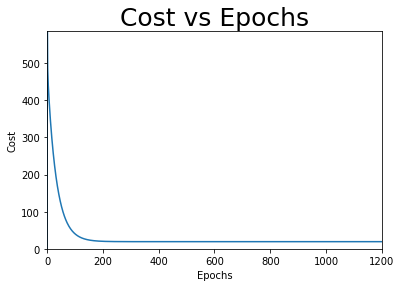

In [93]:
plt.plot(range(len(cost_history)),cost_history)
plt.axis([0,epochs,0,np.max(cost_history)])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost vs Epochs', fontsize=25)
plt.show()

So, we just trained a basic tensorflow model to predict the housing prices.